In [3]:
import math
#import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [70]:
del df
df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")

df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)

# Löscht Blinzeln
#df = df[(df["Gaze Y"] < 1030) == True].reset_index()

# Generiert Geschwindigkeit (Nicht Fertig)
"""
df_rad = pd.DataFrame({'rad/s':[]})
for i in range(len(df)):
    try:
        j = i + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        dx = df.iloc[j]['Gaze X'] - df.iloc[i]['Gaze X']
        dy = df.iloc[j]['Gaze Y'] - df.iloc[i]['Gaze Y']
        d = np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X']) ** 2 + (df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y']) ** 2)
        v = d / t
        if df.iloc[i]['Gaze X'] == df.iloc[j]['Gaze X']:
            vy = v
        elif df.iloc[i]['Gaze Y'] == df.iloc[j]['Gaze Y']:
            vx = v
        else:
            m = dy / dx
            a = np.arcsin(dx / d)
            vx = v * np.sin(a)
            vy = v * np.cos(a)

        df_rad = df_rad.append({'rad/s':calc},ignore_index=True)
    except IndexError:
        pass
df['rad/s'] = df_rad
"""
# Generiert Fixiation
try:
    del df_test
    del f
except NameError:
    pass
df_fix = pd.DataFrame({'Fixation':[]})
f = 1
for i in range(len(df)):
    try:
        j = i + 1
        k = j + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        if np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2)  <= 38 and np.sqrt((df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y'])** 2)  <= 20:
            df_fix = df_fix.append({'Fixation':f},ignore_index=True).astype(int)
        else:
            df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
            if np.sqrt((df.iloc[j]['Gaze X'] - df.iloc[k]['Gaze X'])** 2)  < 20 and np.sqrt((df.iloc[j]['Gaze Y'] - df.iloc[k]['Gaze Y'])** 2)  < 20:
                f += 1
            else: pass
    except IndexError:
        df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
df['Fixation'] = df_fix['Fixation']
df['Fixation'] = df['Fixation'].astype(int)
del df['Index']
df
#df.to_csv("test_test.csv")
#df["Gaze Y"][1773:2324].mean()

,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,Fixation
0,0.000000,1216,1066,NaN,TrackingConfidence.HIGH,0,1
1,0.028026,1216,1066,NaN,TrackingConfidence.HIGH,28,1
2,0.048044,1232,1068,NaN,TrackingConfidence.HIGH,48,1
3,0.067060,1232,1068,NaN,TrackingConfidence.HIGH,67,1
4,0.086078,1232,1067,NaN,TrackingConfidence.HIGH,86,1
...,...,...,...,...,...,...,...
15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,1881
15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,1881
15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,1881
15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,1881


In [204]:
df

,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,Fixation
0,0.000000,1216,1066,NaN,TrackingConfidence.HIGH,0,1
1,0.028026,1216,1066,NaN,TrackingConfidence.HIGH,28,1
2,0.048044,1232,1068,NaN,TrackingConfidence.HIGH,48,1
3,0.067060,1232,1068,NaN,TrackingConfidence.HIGH,67,1
4,0.086078,1232,1067,NaN,TrackingConfidence.HIGH,86,1
...,...,...,...,...,...,...,...
15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,1881
15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,1881
15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,1881
15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,1881


In [63]:
# dx & dy = differenz. d = Abstand, vx & vy = Geschwindigkeit in x & y Richtung [px/s], v = Betrag des Geschwidkeitsvektor [px/s], a = Richtung, omega = winkelgeschwindigkeit
del df_rad
df_rad = pd.DataFrame({'dx':[], 'dy':[],'d':[],'vx':[],'vy':[],'v':[],'a':[]})
df[] = df[]
for i in range(len(df)):
    try:
        j = i + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        dx = df.iloc[j]['Gaze X'] - df.iloc[i]['Gaze X']
        dy = df.iloc[j]['Gaze Y'] - df.iloc[i]['Gaze Y']
        d = np.sqrt(dx ** 2 + dy ** 2)
        v = d / t
        if dx == 0 and dy == 0:
            v = 0
            vx = 0
            vy = 0
            a = 0
        elif dx == 0 and dy != 0:
            vy = v
            vx = 0
            a = 0
        elif dy == 0 and dx != 0:
            vx = v
            vy = 0
            a = np.pi / 2
        else:
            m = dy / dx
            a = np.arcsin(dx / d)
            vx = v * np.sin(a)
            vy = v * np.cos(a)
        #print(int(vx),int(vy),int(v))

        df_rad = df_rad.append({'dx':int(dx), 'dy':int(dy),'d':int(d),'vx':int(vx),'vy':int(vy),'v':int(v),'a':int(a)},ignore_index=True)
    except IndexError:
        pass

In [56]:
df_rad

,dx,dy,d,vx,vy,v,a
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,2.0,16.0,799.0,99.0,805.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.0,1.0,0.0,52.0,52.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
15877,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15878,-2.0,-8.0,8.0,-99.0,399.0,411.0,0.0
15879,2.0,0.0,2.0,91.0,0.0,91.0,1.0
15880,4.0,-9.0,9.0,191.0,430.0,470.0,0.0


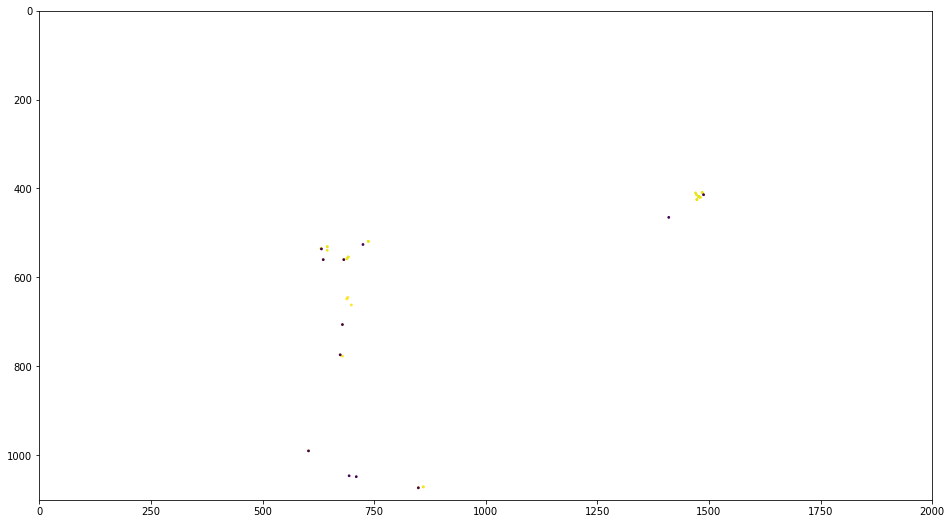

In [216]:
x = df["Gaze X"][2679:2729]
y = df["Gaze Y"][2679:2729]
z = df['Fixation'][2679:2729]
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3, c=z)
plt.show()

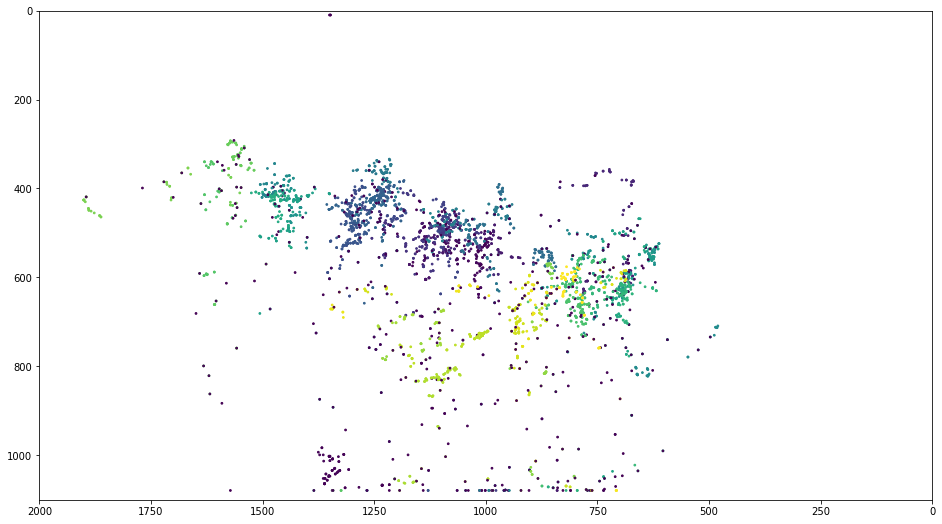

In [203]:
x = df_new["Gaze X"][0:4000]
y = df_new["Gaze Y"][0:4000]
z = df_new['Fixation'][0:4000]
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([2000,0,1100,0])
plt.scatter(x,y, s = 3, c=z)
plt.show()

In [ ]:
try:
    del df_test
    del f
except NameError:
    pass
df_fix = pd.DataFrame({'Fixation':[]})
f = 1
for i in range(len(df)):
    try:
        j = i + 1
        k = j + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        if np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y'])** 2)  < 10:
            df_fix = df_fix.append({'Fixation':f},ignore_index=True).astype(int)
        else:
            df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
            if np.sqrt((df.iloc[j]['Gaze X'] - df.iloc[k]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[j]['Gaze Y'] - df.iloc[k]['Gaze Y'])** 2)  < 10:
                f += 1
            else: pass
    except IndexError:
        df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
df['Fixation'] = df_fix['Fixation']
df['Fixation'] = df['Fixation'].astype(int)

In [202]:
try:
    del df_new
except NameError:
    pass
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
df_new = pd.concat([df,df_rad],axis=1)
#df_new = df_new[(df_new["dy"] >= 20* df_new["dx"]) == True].reset_index()
#df_new = df_new[(df_new["dy"] > 0) == True].reset_index()
#df_new = df_new[df_new["dx"] >= 10 == True].reset_index()
#df_new = df_new[df_new["dx"] >= -10 == True].reset_index()
#df_new = df_new[(df_new["vx"] < -10) == True].reset_index()
#df_new = df_new[(df_new["vx"] > 100) == True].reset_index()
#df_new = df_new[(df_new["vy"] <= 1000) == True].reset_index()
#df_new = df_new[(df_new["Gaze Y"] <= 1030 ) == True].reset_index()
df_new


,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,Fixation,dx,dy,d,vx,vy,v,a
0,0.000000,1216,1066,NaN,TrackingConfidence.HIGH,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028026,1216,1066,NaN,TrackingConfidence.HIGH,28,1,16.0,2.0,16.0,799.0,99.0,805.0,1.0
2,0.048044,1232,1068,NaN,TrackingConfidence.HIGH,48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.067060,1232,1068,NaN,TrackingConfidence.HIGH,67,1,0.0,-1.0,1.0,0.0,52.0,52.0,0.0
4,0.086078,1232,1067,NaN,TrackingConfidence.HIGH,86,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,1881,-2.0,-8.0,8.0,-99.0,399.0,411.0,0.0
15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,1881,2.0,0.0,2.0,91.0,0.0,91.0,1.0
15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,1881,4.0,-9.0,9.0,191.0,430.0,470.0,0.0
15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,1881,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
df_rad

,dx,dy,d,vx,vy,v,a
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,2.0,16.0,799.0,99.0,805.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.0,1.0,0.0,52.0,52.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
15877,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15878,-2.0,-8.0,8.0,-99.0,399.0,411.0,0.0
15879,2.0,0.0,2.0,91.0,0.0,91.0,1.0
15880,4.0,-9.0,9.0,191.0,430.0,470.0,0.0


In [29]:
np.sqrt((df.iloc[3456]['Gaze X'] - df.iloc[3457]['Gaze X']) ** 2 + (df.iloc[3456]['Gaze Y'] - df.iloc[3457]['Gaze Y']) ** 2) / t

261.86936444136484

In [137]:
try:
    del df_test
    del f
except NameError:
    pass
df_fix = pd.DataFrame({'Fixation':[]})
f = 1
for i in range(len(df)):
    try:
        j = i + 1
        k = j + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        if np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y'])** 2)  < 10:
            df_fix = df_fix.append({'Fixation':f},ignore_index=True).astype(int)
        else:
            df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
            if np.sqrt((df.iloc[j]['Gaze X'] - df.iloc[k]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[j]['Gaze Y'] - df.iloc[k]['Gaze Y'])** 2)  < 10:
                f += 1
            else: pass
    except IndexError:
        df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
df['Fixation'] = df_fix['Fixation']
df['Fixation'] = df['Fixation'].astype(int)

In [138]:
df

,index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,rad/s,Fixation
0,29,0.577272,1318,998,NaN,TrackingConfidence.HIGH,577,0.000000,1
1,30,0.596290,1318,998,NaN,TrackingConfidence.HIGH,596,0.000000,1
2,31,0.616308,1318,998,NaN,TrackingConfidence.HIGH,616,847.791174,0
3,32,0.636325,1330,1003,NaN,TrackingConfidence.HIGH,636,74.362100,0
4,33,0.655343,1329,1014,NaN,TrackingConfidence.HIGH,655,0.000000,2
...,...,...,...,...,...,...,...,...,...
15264,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,141.281702,3775
15265,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,128.997806,3775
15266,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,270.366653,3775
15267,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,0.000000,3775


/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,index,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,rad/s,Fixation
0,29,29,0.577272,1318,998,NaN,TrackingConfidence.HIGH,577,0.000000,1
1,30,30,0.596290,1318,998,NaN,TrackingConfidence.HIGH,596,0.000000,1
2,31,31,0.616308,1318,998,NaN,TrackingConfidence.HIGH,616,847.791174,1
3,32,32,0.636325,1330,1003,NaN,TrackingConfidence.HIGH,636,74.362100,1
4,33,33,0.655343,1329,1014,NaN,TrackingConfidence.HIGH,655,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
15264,15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,141.281702,1
15265,15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,128.997806,1
15266,15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,270.366653,1
15267,15881,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,0.000000,1


""
